# Dataset Generation - Sine Waves

One of the simplest time series challenges - given initial points on a sine wave, predict the next one. The data will be cut into segments of length 11: 10 previous observations + the next one, to be predicted. Generated waves will have different frequencies, and will be distributed into 3 splits for training, test and validation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

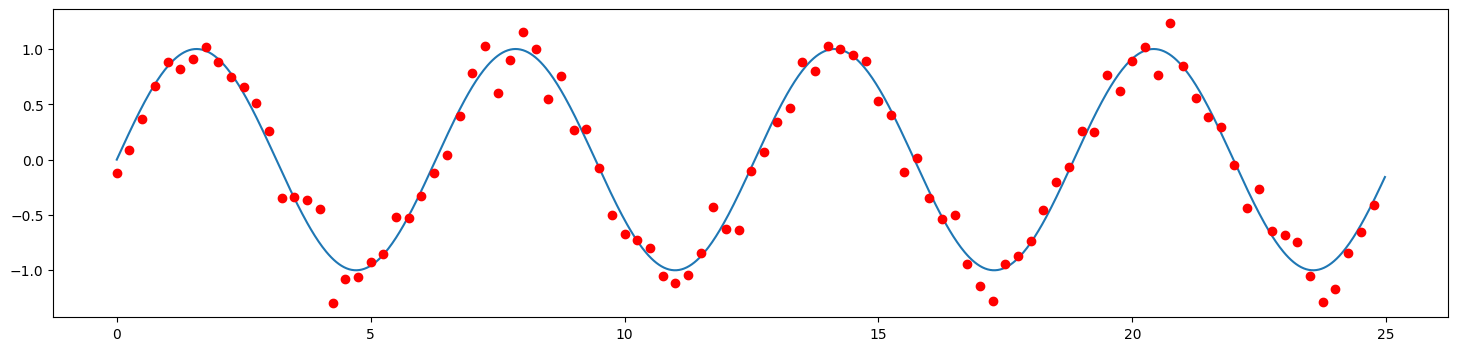

In [2]:
f = 4

x = np.arange(100)/f
plt.figure(figsize=(18,4))
plt.plot(np.arange(1000)/f/10, np.sin(np.arange(1000)/f/10), markersize=1)
# plt.plot(x, np.sin(x), 'o', color='green', markersize=6)
plt.plot(x, np.sin(x)+np.random.randn(*x.shape)/7, 'o', color='red', markersize=6)
plt.show()

To make the task interesting, we will consider only sequences with frequencies $1 \leq f \leq 8$. For each of such waves, we will geenerate a sequence of length 500. More precisely, for a fixed frequency $f$, the i'th element of the generated sequence is defined as $$x_i = \sin\left(\phi + \frac{i}{f}\right) + \epsilon\cdot\mathcal{N}(0,1)$$ where $\epsilon$ is sampled uniforly from the range $[0.08,0.14]$ and $\phi$ is sampled uniformly from $[0,2\pi]$.
These instances will then be randomly distributed into the training : validation : test splits in 80:10:10 ratio.

In [4]:
data = np.zeros((700, 500))

for i in range(700):

    # Define the frequency
    f = 1 + i * 0.01

    # Sample the phase and noise amount
    phi = np.random.random() * 2 * np.pi
    eps = np.random.random() * 0.06 + 0.08

    # Generate the instance
    data[i] = np.sin(np.arange(500) / f + phi) + np.random.randn(500) * eps

data = data[:, :, np.newaxis]
data.shape

(700, 500, 1)

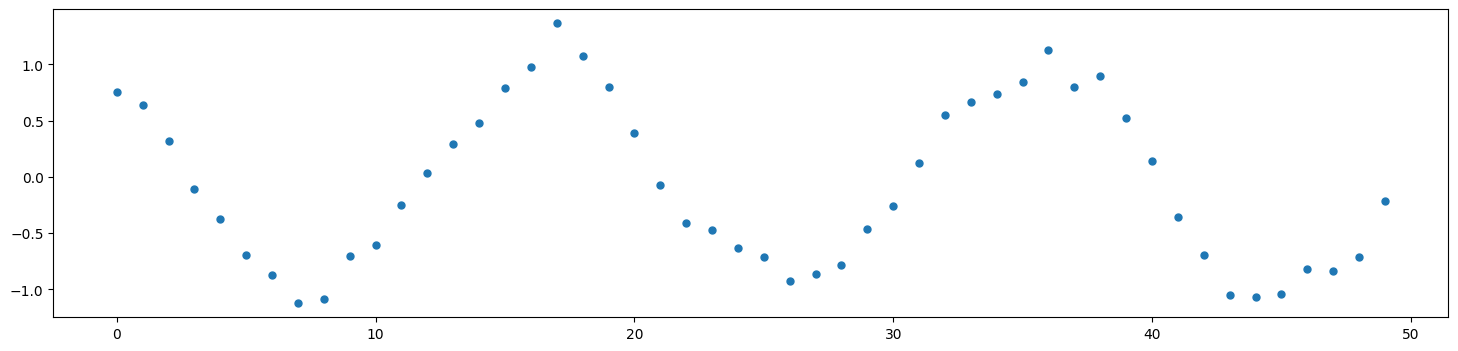

In [5]:
plt.figure(figsize=(18,4))
plt.plot(np.arange(50), data[200,:50], 'o', markersize=5)
plt.show()

In [6]:
# Split the data into training, validation and testing
rand_perm = np.random.permutation(700)

train_data = data[rand_perm][:560]
valid_data = data[rand_perm][560:630]
test_data = data[rand_perm][630:]

In [7]:
np.save('sinwave/train.npy', train_data)
np.save('sinwave/valid.npy', valid_data)
np.save('sinwave/test.npy', test_data)